<a href="https://colab.research.google.com/github/lauren-forti/Programming-for-Data-Science/blob/main/forti_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC310 Midterm:** Credit Prediction Dataset
### Lauren Forti
### 3/21/2021

# **I. Dataset**

In [ ]:
# preamble to be able to run notebooks in Colab
from google.colab import drive
import sys

# mount the drive
drive.mount('/content/drive', force_remount=True) 

# useful folders
notes_home = "/content/drive/Shareddrives/CSC310/ds/notes/"
user_home = "/content/drive/MyDrive/"
    
# insert the notes folder into the path so we can include assets modules etc
sys.path.insert(1,notes_home) 

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from assets.confint import classification_confint

Convert CSV file to DataFrame

In [ ]:
# get data
df = pd.read_csv("/content/drive/Shareddrives/CSC310/credit_predict.csv")

# visually inspect first ten rows of DataFrame
df.head(n=10)

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor
5,80.180,8047,4,77,10,0,fair
6,20.996,3388,2,37,12,1,poor
7,71.408,7114,2,87,9,0,poor
8,15.125,3300,5,66,13,1,poor
9,71.061,6819,3,41,19,1,poor


Create the features matrix by dropping the target vector from the DataFrame. This also isolates the independent variables from the dataset.

In [ ]:
# get features DataFrame
features_df = df.drop(['Rating_Label'], axis = 1)
features_df.head()

,Income,Limit,Cards,Age,Education,Gender_Val
0,14.891,3606,2,34,11,0
1,106.025,6645,3,82,15,1
2,104.593,7075,4,71,11,0
3,148.924,9504,3,36,11,1
4,55.882,4897,2,68,16,0


Create the target vector by isolating the "Rating_Label" column.
This also isolates the target variable from the rest of the dataset.

In [ ]:
# get target variable DataFrame
target_df = pd.DataFrame(df['Rating_Label'])
target_df.head()

,Rating_Label
0,poor
1,poor
2,poor
3,fair
4,poor


# **II. Preliminary Analysis**

## How many independent variables are there?

In [ ]:
# calculate the number of columns in the features DataFrame
features_df.shape[1]

6

There are 6 independent variables.

## Report basic descriptive statistics (min, max, mean) for each independent variable.

In [ ]:
# calculate basic statistics on independent variables
features_df.describe()

,Income,Limit,Cards,Age,Education,Gender_Val
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,2.957500,55.667500,13.450000,0.517500
std,35.244273,2308.198848,1.371275,17.249807,3.125207,0.500319
min,10.354000,855.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,2.000000,41.750000,11.000000,0.000000
50%,33.115500,4622.500000,3.000000,56.000000,14.000000,1.000000
75%,57.470750,5872.750000,4.000000,70.000000,16.000000,1.000000
max,186.634000,13913.000000,9.000000,98.000000,20.000000,1.000000


#### **Income**
* **min:** 10.4
* **max:** 186.6
* **mean:** 45.2

---

#### **Limit**
* **min:** 855.0
* **max:** 13913.0
* **mean:** 4735.6

---

#### **Cards**
* **min:** 1.0
* **max:** 9.0
* **mean:** 3.0

---

#### **Age**
* **min:** 23.0
* **max:** 98.0
* **mean:** 56.7

---

#### **Education**
* **min:** 5.0
* **max:** 20.0
* **mean:** 13.5

---

#### **Gender_Val**
* **min:** 0.0
* **max:** 1.0
* **mean:** 0.5

## Determine if each independent variable is multi-modal or not and report.

Below are histograms of all independent variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab24429d10>,
      dtype=object)

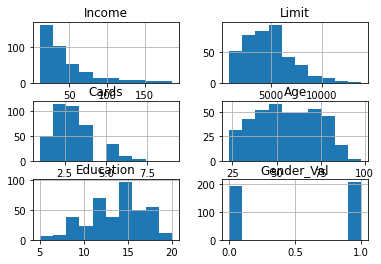

In [ ]:
# make histograms of all independent variables
features_df.hist()

Let's take a closer look at the individual histograms of the independent variables:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


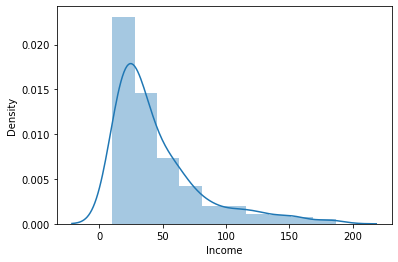

In [ ]:
null = sns.distplot(features_df['Income'], hist = True, kde = True, bins = 10)

The graph above for **Income** has only one peak, making it unimodal. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


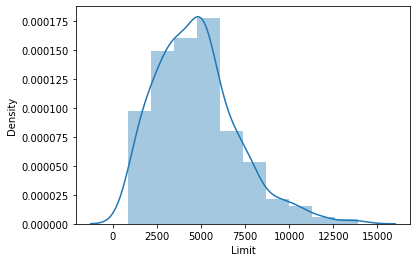

In [ ]:
null = sns.distplot(features_df['Limit'], hist = True, kde = True, bins = 10)

The graph above is for **Limit**, which has only one peak, making it unimodal. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


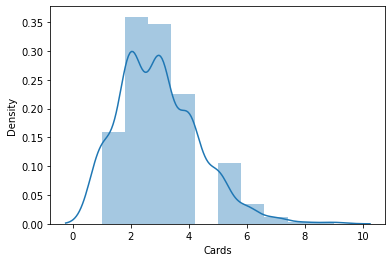

In [ ]:
null = sns.distplot(features_df['Cards'], hist = True, kde = True, bins = 10)

The graph above for **Cards** has two distinct clusters. One starts at 1 and ends a little past 4. The second starts around 5 and ends at 9. This makes **Cards** multimodal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


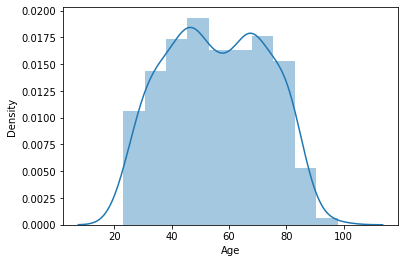

In [ ]:
null = sns.distplot(features_df['Age'], hist = True, kde = True, bins = 10)

The graph above for **Age** has two peaks. One starts around 45 and ends around 55. The second starts around 75 and ends a little before 80. This makes it multimodal. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


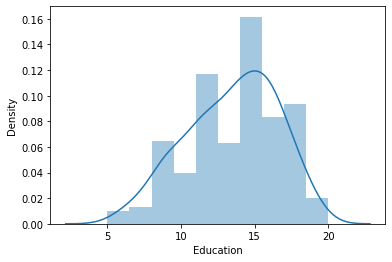

In [ ]:
null = sns.distplot(features_df['Education'], hist = True, kde = True, bins = 10)

The graph above for **Education** has several peaks, making it multimodal. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


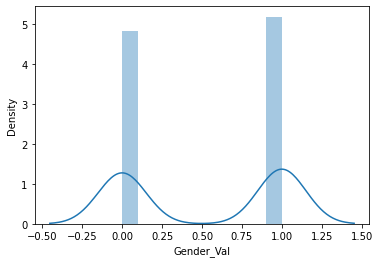

In [ ]:
null = sns.distplot(features_df['Gender_Val'], hist = True, kde = True, bins = 10)

The graph above for **Gender_Val** has two distinct clusters. One starts at 0 and ends at 0.1. The second starts at 0.9 and ends at 1. This makes **Gender_Val** multimodal.

### In Summary:

**Unimodal:**
* Income
* Limit


**Multimodal:**
* Cards
* Age
* Education
* Gender_Val

## Use scatter plots to determine if there are interesting relationships between variables or if observations in the data set form clusters.

We can plot the independent variables with the target variable (Rating_Label) as the colors. This will make the clustering more aparent.

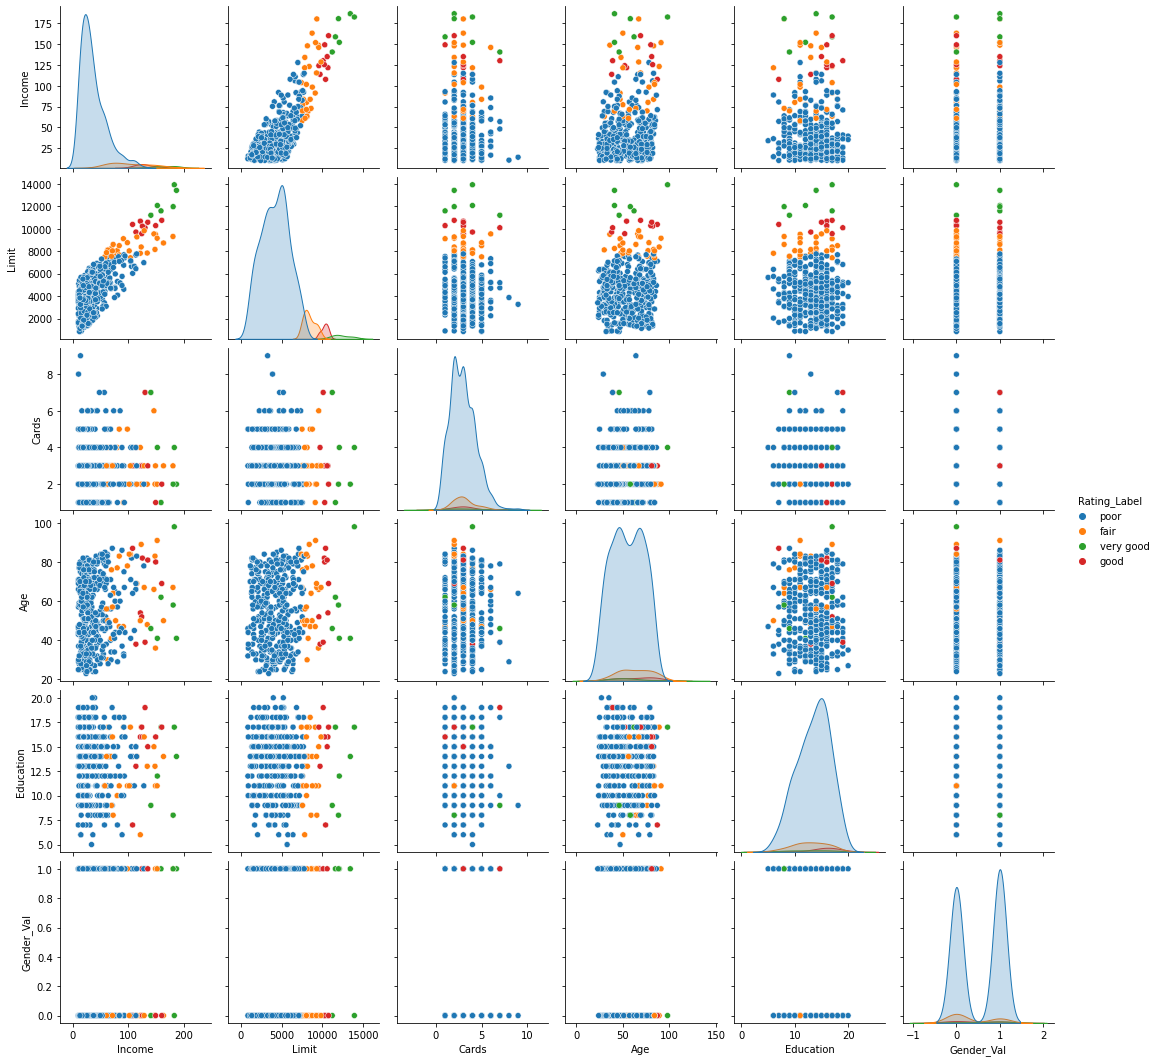

In [ ]:
# plot independent variables with the target variable as the color
sns.pairplot(df, hue = 'Rating_Label')

There are two important general observations for all of the scatterplots:
1. Most of the scatterplots have a general ranking/ordering of the clusters from **poor** to **very good**. The lowest values tend to be the lowest ranking (**poor**). As values increase, the rank increases to **fair**, then **good**, then **very good**.

2. Within these ranked clusters, it can be clearly seen that there is a decreased frequency in the points as the ranking increases. Points classified as **poor** have the highest frequency, **fair** the next highest frequency, and so on. The **very good** label has the lowest frequency. 

A pattern emerges in graphs plotting **Limit**. As the value of the **Limit** increases, so does the classification of credit.

The clearest relationships appear when comparing the labels **Income**, **Age**, and especially **Limit**. We can compare **Age** and **Income** in a scatter plot:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


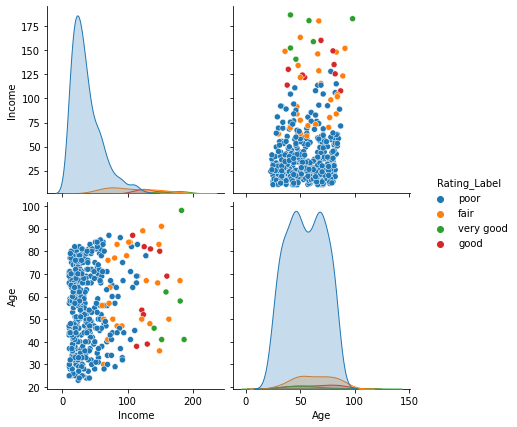

In [ ]:
sns.pairplot(df, hue = 'Rating_Label', size = 3, vars = ['Income', 'Age'])

As **Income** increases, there is a slight increase of **Age** values. The distribution of **Rating_Label** rankings loosely increase with increases in **Income**.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


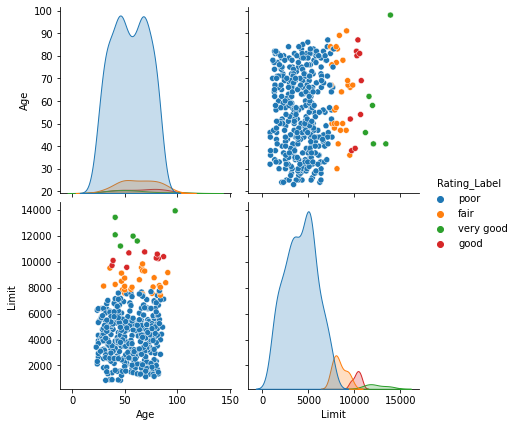

In [ ]:
sns.pairplot(df, hue = 'Rating_Label', size = 3, vars = ['Age', 'Limit'])

In the graph above for **Age** and **Limit**, there is a similar trend where an increase in **Age** leads to a slight increase in **Limit**. The distribution of the **Rating_Label** is less random for **fair** - **very good** with more distinct clustering of **Limit** values:
* 0 - 8000 = **poor**
* 8000 - 10000 = **fair**
* 10000 - 11000 = **good**
* 11000 - 14000 = **very good**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


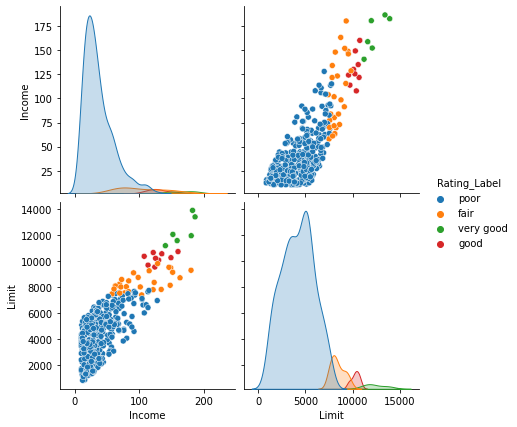

In [ ]:
sns.pairplot(df, hue = 'Rating_Label', size = 3, vars = ['Income', 'Limit'])

In the graph above of **Income** and **Limit**, there is a clear relationship. As **Income** increases, so does **Limit**. The stark clustering of **Rating_Label** by **Limit** is reiterated.

## Determine how many labels there are in the dependent variable.

In [ ]:
# print labels and number of instances of labels
target_df['Rating_Label'].value_counts()

poor         358
fair          27
good           9
very good      6
Name: Rating_Label, dtype: int64

There are 4 labels in the dependent variable:
1. poor
2. fair
3. good
4. very good

## Is this a balanced classification problem? If yes, why? If no, why not?

No, this is not a balanced classification problem because the distribution of labels is drastically uneven. From the value counts above, **poor** dominates over the other labels. This can be further illustrated by visualizing the counts of the labels. 

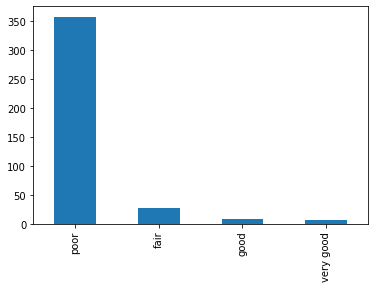

In [ ]:
# plot bar chart of labels
df['Rating_Label'].value_counts().plot.bar()

In the bar graph above, **poor** is by far the most frequent label. The second most frequent label, **fair**, appears only 27 times.

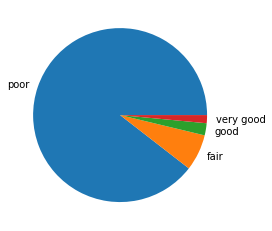

In [ ]:
# plot pie chart of labels
plot_series = df['Rating_Label'].rename('')
plot_series.rename('').value_counts().plot.pie()

In the pie chart above, it is visible how much **poor** takes up out of the total number of all labels. 

# **III. Model Building**

## Find the best possible decision tree model

First, build a decision tree model without limitation on the depth to get the highest possible max depth. This will provide the end point of the max_depth range for the grid search.

In [ ]:
# get data
X  = df.drop(['Rating_Label'], axis = 1)
y = df['Rating_Label']

# build and train model
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(X, y)

# print tree without limit on max depth to get range
tree_print(model, X)

if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then if Limit =< 7502.5: 
  |  |  |  |then fair
  |  |  |  |else if Education =< 12.5: 
  |  |  |  |  |then if Income =< 66.8759994506836: 
  |  |  |  |  |  |then poor
  |  |  |  |  |  |else fair
  |  |  |  |  |else poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then if Limit =< 9956.0: 
  |  |  |  |then if Gender_Val =< 0.5: 
  |  |  |  |  |then fair
  |  |  |  |  |else good
  |  |  |  |else good
  |  |  |else very good
<---------------->
Tree Depth:  6


Set up, build, and perform the grid search:

In [ ]:
# set up grid search
new_model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1, 7)),
    'criterion': ['entropy', 'gini']
    }

# build grid search object
grid = GridSearchCV(new_model, param_grid, cv = 5)

# perform grid search 
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

## What are the best hyper-parameters?

In [ ]:
# print best parameters
print('Best parameters: {}'.format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 3}


The best parameters are criteron = entropy and max_depth = 3

## Print the best tree

In [ ]:
# print best tree model
best_model = grid.best_estimator_
tree_print(best_model, X)

if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then good
  |  |  |else very good
<------->
Tree Depth:  3


## Comment on the best tree model.  Any surprises?  Is it intuitive or has it revealed something that is perhaps unusual? Can you relate the tree model back to graphs and scatter plots?



It is not surprsing that **Limit** is the main determining factor in the tree. In the scatterplots created earlier, the most meaningful patterns and relationships was when labels were compared to either **Limit** or **Income**.

The **Limit** and **Income** label are the only labels in the tree directly relating to monetary factors, and **Limit** is more of a direct factor for credit than **Income** alone. **Limit** reflects how much money is spent, how much is paid back, and how much is owed. **Income** alone does not really reflect how credit cards are used by the consumer. While the other labels (**Education**, **Cards**, **Gende_Val**, and **Age**) are relevant, it makes sense that **Limit** is the main determining factor for credit rating.

The tree is intuitive in the sense that the higher the **Limit** is, the higher the credit rating. It almost resembles an order or ranking, from poor to very good. It is unlikely that someone with very good credit would have a low limit for lending. As the **Limit** increases in the tree, so does the credit rating.

This can be visualized in the graphs below:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


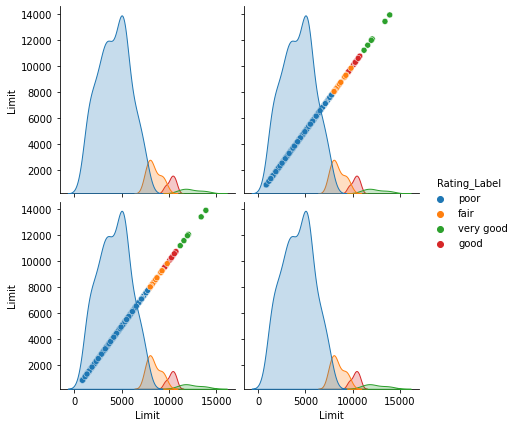

In [ ]:
sns.pairplot(df, hue = 'Rating_Label', size = 3, vars = ['Limit', 'Limit'])

It is important to note that the tree has an interesting separation between the first level and the third level. The first level is:

```
if Limit =< 7409.0: 
  |then poor
```
Then the second and third levels are: 
```
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then poor
```
This is a bit odd to read, because it first clusters **poor** by a **Limit** under 7409, then again if it is under 7789. The first level almost seems redundant. So **poor** does not only have a **Limit** under 7409, but actually under a **Limit** of 9550 and then under a **Limit** of 7789.

This can be explained by the decision surfaces plotted below:

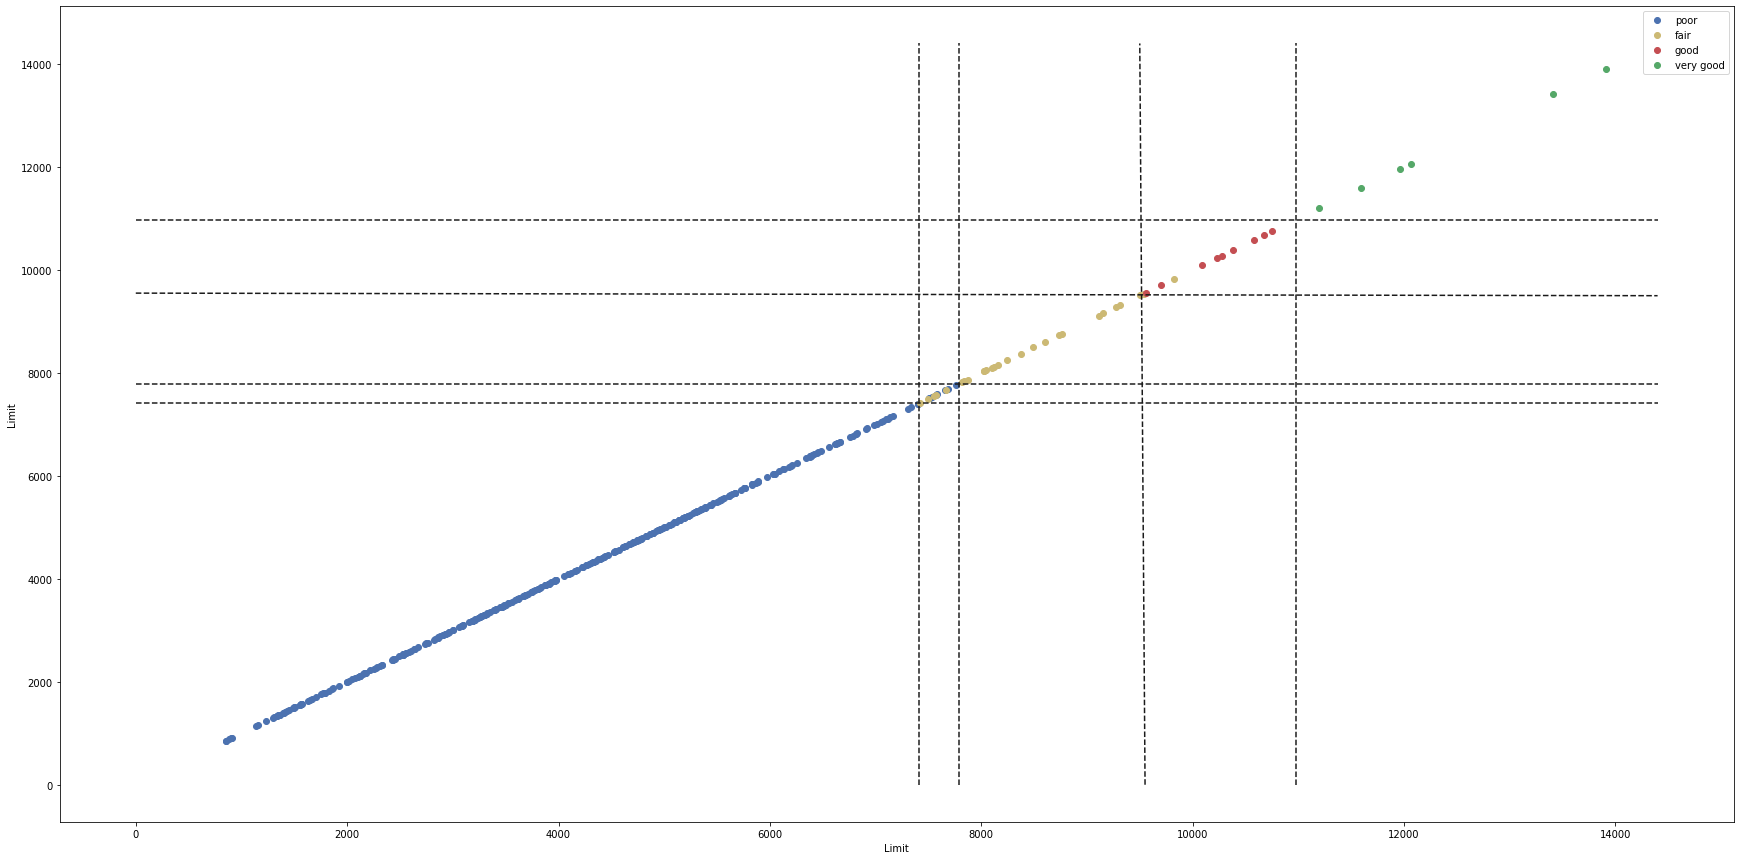

In [ ]:
# isolating labels
p_df = df[df['Rating_Label'] == 'poor']
f_df = df[df['Rating_Label'] == 'fair']
g_df = df[df['Rating_Label'] == 'good']
vg_df = df[df['Rating_Label'] == 'very good']

# scatter plot of the data
plt.figure(figsize = (30, 15))
plt.plot(p_df['Limit'], p_df['Limit'], 'bo')
plt.plot(f_df['Limit'], f_df['Limit'], 'yo')
plt.plot(g_df['Limit'], g_df['Limit'], 'ro')
plt.plot(vg_df['Limit'], vg_df['Limit'], 'go')
plt.xlabel('Limit')
plt.ylabel('Limit')
plt.legend(['poor', 'fair', 'good', 'very good'])

# plotting the decision surfaces
plt.plot([7409, 7409], [0, 14400], 'k--')
plt.plot([0,14400],[7409, 7409], 'k--')

plt.plot([9550, 9500], [0, 14400], 'k--')
plt.plot([0,14400],[9550, 9500], 'k--')

plt.plot([7789, 7789], [0, 14400], 'k--')
plt.plot([0, 14400], [7789, 7789], 'k--')

plt.plot([10974, 10974], [0, 14400], 'k--')
plt.plot([0, 14400], [10974, 10974], 'k--')

In the plotted decision surfaces above, there is overlap of **poor** and **fair** classifications between **Limit** values of 7409 and 7789 in the original dataset:

Points with a **Limit** equal to or under 7409 are strictly classified as **poor**. 

Points with a **Limit** above 7789 are strictly classified as **fair**. 

The area inbetween these values (7789 - 7409) are classified as **poor** by the decision tree but there are both **poor** and **fair** points in this value of **Limit** of the dataset. This overlap is not captured by the decision tree. It can be assumed that there are more **poor** points in this range than **fair**. The **fair** points within this range are considered errors or outliers by the decision tree. 

There is also an outlier in the dataset which is categorized as **fair** in the range of **good**, around 9750.

In the confusion matrix, both of these areas will be recognized as classification errors.

Also noticeable in the plotted decision surface is that the tree is reflected in the **Limit** values , aside from the 7409 - 7789 **poor**/**fair** overlap which the tree classifies as **poor**: 

* Below 7409 is **poor**
* 7789 - 9550 is **fair**
* 9550 - 10994 is **good**
* 10994  and above is **very good**

# IV. Model evaluation

## Compute the model accuracy of the best tree obtained above using the whole training dataset

In [ ]:
# get accuracy 
predict_y = grid.best_estimator_.predict(X)
print('Model Accuracy: {}'.format(accuracy_score(y, predict_y)))

Model Accuracy: 0.985


## Compute the 95% classification confidence interval for this model.

In [ ]:
y_predict = best_model.predict(X)
acc = accuracy_score(y, y_predict)
observations = X.shape[0]
lb, ub = classification_confint(acc, observations)
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc, lb, ub))

Accuracy: 0.98 (0.97,1.00)


We can say with 95% confidence that the accuracy of this model is between .97 and 1.00.

## Compute and display the confusion matrix and comment on the kind of errors the model makes. Make sure that you are using the correct labels in the confusion matrix.

In [ ]:
# build confusion matrix for model
labels = ['poor', 'fair', 'good', 'very good']
cm = confusion_matrix(y, predict_y, labels = labels)

# convert confusion matrix to DataFrame and display
cm_df = pd.DataFrame(cm, index = labels, columns = labels)
display(cm_df)

,poor,fair,good,very good
poor,358,0,0,0
fair,5,21,1,0
good,0,0,9,0
very good,0,0,0,6


The **poor**, **good**, and **very good** labels all have accurate classifications. The predicted points that should be labeled as poor, good, or very good are correctly labeled as such. There are no errors for these labels. 

This is not the case for **fair**, however. 

In [ ]:
# show counts of labels in target vector
target_df.value_counts()

Rating_Label
poor            358
fair             27
good              9
very good         6
dtype: int64

Looking at the value counts above, there are 27 points in the original dataset classified as **fair**. In the predicted data, only 21 points are classified correctly as **fair**.

There are a total of 6 classification errors. 

There are 5 points that should be classified as **fair** but are classified as **poor**. 

There is 1 point that should be classified as **fair** but is classified as **good**.

From the perspective of the credit card companies, it is worse that consumers that should be classified as **fair** are classified as **good** than consumers that should be classified as **fair** be classified as **poor**. 

From the perspective of the consumer, it is the opposite. It is beneficial for the consumer to be classified as **good** rather than  **fair**. It is a disadvantage for the consumer to be classified as **poor** when they should be classified as **good**. They will face unneccessary restrictions.